In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, LabelEncoder
Ss = StandardScaler()
label = LabelEncoder()
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_QoiMO9B.csv')

In [4]:
train.shape, test.shape

((456548, 9), (32573, 8))

In [5]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [7]:
train.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [9]:
test.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

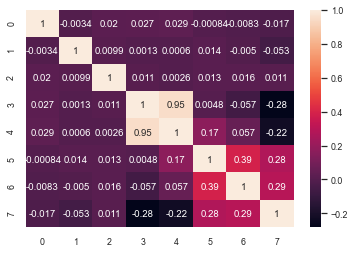

In [14]:
cols = ['week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion','homepage_featured','num_orders']
cn = np.corrcoef(train[cols].values.T)
sns.set(font_scale = .8)
sns.heatmap(cn, annot = True)
plt.show()

In [9]:
X = train.drop(['num_orders'], axis =1)
y = train[['num_orders']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 500)

In [11]:
X_train_std = Ss.fit_transform(X_train)
X_test_std = Ss.fit_transform(X_test)

In [12]:
pca = PCA(n_components = 8)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

In [13]:
# without PCA 
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

Lr.fit(X_train_std, y_train)
y_pred = Lr.predict(X_test_std)
accuracy_score = (y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
rmse1 = np.sqrt(MSE)
print('MSE', MSE)
print("RMSE", rmse1)

MSE 119664.00847156138
RMSE 345.9248595743899


In [14]:
#with PCA
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

Lr.fit(X_train_pca, y_train)
y_pred = Lr.predict(X_test_pca)
accuracy_score = (y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
rmse1 = np.sqrt(MSE)
print('MSE', MSE)
print("RMSE", rmse1)

MSE 119705.46133808355
RMSE 345.9847703845988


In [15]:
#without pca
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train_std, y_train)
y_pred = DT.predict(X_test_std)
accuracy_score = (y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
rmse3 = np.sqrt(MSE)
print('MSE', MSE)
print("RMSE", rmse3)

MSE 63843.759369181906
RMSE 252.67322645896203


In [17]:
#without pca
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train_std, y_train)
y_pred = KNN.predict(X_test_std)
accuracy_score = (y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
rmse4 = np.sqrt(MSE)
print('MSE', MSE)
print("RMSE", rmse4)

MSE 72272.15917862226
RMSE 268.8348176457474


In [18]:
#with pca
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train_pca, y_train)
y_pred = KNN.predict(X_test_pca)
accuracy_score = (y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
rmse4 = np.sqrt(MSE)
print('MSE', MSE)
print("RMSE", rmse4)

MSE 88046.6055621509
RMSE 296.72648274488563


In [19]:
#without pca
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train_std, y_train)
y_pred = RF.predict(X_test_std)
accuracy_score = (y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
rmse5 = np.sqrt(MSE)
print('MSE', MSE)
print("RMSE", rmse5)

MSE 34718.39391147191
RMSE 186.3287254061271


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(X_train_pca, y_train)
y_pred = GB.predict(X_test_pca)
MSE = metrics.mean_squared_error(y_test,y_pred)
rmse7 = np.sqrt(MSE)
print('MSE', MSE)
print("RMSE", rmse7)

MSE 99886.91113207012
RMSE 316.04890623457334


In [30]:
from sklearn.ensemble import AdaBoostRegressor

ADB = AdaBoostRegressor(base_estimator = DT, n_estimators = 100, learning_rate = 0.1)

ADB.fit(X_train_std, y_train)
y_pred = ADB.predict(X_test_std)
MSE = metrics.mean_squared_error(y_test,y_pred)
rmse7 = np.sqrt(MSE)
print('MSE', MSE)
print("RMSE", rmse7)

MSE 41414.33546161428
RMSE 203.50512391980277


In [ ]:
algo_names = ['LogisticRegression',
             'DecisionTreeRegressor',
             'KNeighborsRegressor',
             'Support vector Machince',
             'RandomForestRegressor',
             'GaussianNB',
             'GradientBoostingClassifier']
RMSE_list = [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7]